In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import models
import sys
sys.path.append('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/')
from Hyperparam_Testing.Testing_Notebooks import chirallag as cL
from Hyperparam_Testing.Testing_Notebooks import Common_Functions as cf
import datetime 

In [3]:
number_predictions = 10**7
N = 3
gens = cL.gen_gellman(N)
pi=np.random.rand(number_predictions,N*N-1)
dpi=np.random.rand(number_predictions,N*N-1)
test_set = np.hstack((pi,dpi))
nn_model = models.load_model('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Hyperparam_Testing/Testing_Notebooks/Optimised_Network/Saved_Optimised_Networks/5_107.0datapoints.h5')
def numeric_V(fields):
    pi = fields[:,:8]
    dpi = fields[:,8:16]
    return cL.get_V(pi,dpi,gens,1)  

2022-03-25 08:26:50.520189: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-25 08:26:50.544279: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-25 08:26:50.544630: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-25 08:26:50.545429: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
test_set_sizes = [10**i for i in range(1,8)]
times = {'nn':[],'numeric':[]}
for test_set_size in test_set_sizes:
    data = test_set[:test_set_size]
    ##NNtime 
    ts = datetime.datetime.now()
    nn_model.predict(data)
    te = datetime.datetime.now()
    delta = (te-ts)
    delta_ms = delta.seconds*10**6+delta.microseconds
    times['nn'].append(delta_ms)

    ##Numeric time 
    ts = datetime.datetime.now()
    numeric_V(data)
    te = datetime.datetime.now()
    delta = (te-ts)
    delta_ms = delta.seconds*10**6+delta.microseconds
    times['numeric'].append(delta_ms)

2022-03-25 08:26:51.229773: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


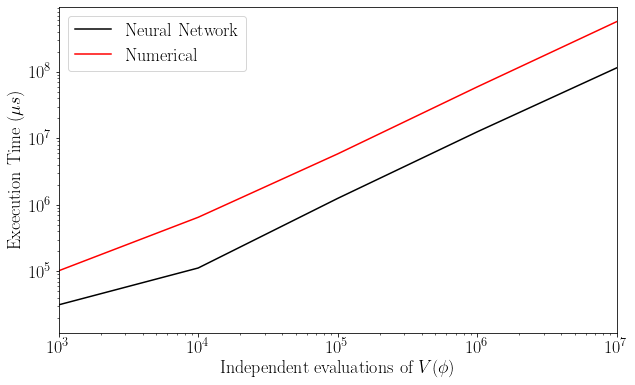

In [13]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.size'] = 18

fig, ax = plt.subplots(1, figsize = (10,6))
ax.loglog(test_set_sizes,times['nn'],label = 'Neural Network' , color = 'black')
ax.loglog(test_set_sizes,times['numeric'], label = 'Numerical', color = 'red')
ax.set_ylabel('Excecution Time $(\mu s)$')
ax.set_xlabel('Independent evaluations of $V(\phi)$')
ax.legend()
ax.set_xlim(1000,10**7)

fig.savefig('../Figures/complexity_scaling.png',dpi = 300)

In [14]:
nn = times['nn']
num = times['numeric']

print(num[-1]/nn[-1])

4.954095288145422
